# Decision Tree
### Decision tree is a supervised learning algorithm that constructs a tree-like model of decisions by recursively partitioning the feature space based on threshold values of input features. It is capable of handling both classification (e.g., predicting categories like Iris species) and regression (e.g., predicting continuous values like wine quality) tasks, making it a flexible tool for initial modeling. Unlike some algorithms, it does not assume a specific underlying data distribution, allowing it to adapt to various datasets. Its hierarchical structure provides intuitive interpretability, as each node represents a decision rule, which is ideal for explaining predictions to stakeholders. However, decision trees are prone to overfitting, especially with noisy or complex datasets, and can be unstable if small changes in data lead to different tree structures.

### Use decision trees as a starting point for prototyping, followed by ensemble methods (e.g., Random Forest) to mitigate overfitting.

|Aspect  |  Details|
| :- | :- |
| Use For           | Classification (e.g., spam detection, disease diagnosis)<br>Regression (e.g., house price estimation, quality prediction) |
| Key Assumptions   | - No strict distributional assumptions<br>- Features should provide discriminative power<br>- Independent observations |
| Advantages        | - Highly interpretable with a tree-like structure<br>- Handles both categorical and numerical data<br>- Requires little data preprocessing |
| Disadvantages     | - Prone to overfitting, especially with deep trees<br>- Unstable: small data changes can alter the tree<br>- Poor performance on noisy or highly complex data |
| Avoid When        | - Datasets with significant noise or outliers<br>- Highly non-linear or intricate relationships<br>- Need for robust generalization without ensembling |
| Real-World Use Case | Loan default prediction (e.g., assessing credit risk based on income and credit history)<br>Medical diagnosis (e.g., classifying patient outcomes based on symptoms) |

## Problem Description: 
### Classify Iris flowers (Setosa, Versicolor, Virginica) using the Kaggle Iris dataset.

Using Kaggle dataset https://www.kaggle.com/datasets/uciml/iris

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joblib 
import os

In [2]:
project_dir = './03_decision_tree'

# load  dataset
data = pd.read_csv(project_dir + '/data/iris.csv')

# select key features and target variable
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'] 

X = data[features] 
y = data['Species']

# scale features to improve model performance.
scaler = StandardScaler() 
X = pd.DataFrame(scaler.fit_transform(X), columns=features)

In [3]:
# split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [4]:
# train the Decision Tree model.
model = DecisionTreeClassifier(max_depth=3, random_state=40) # limit depth for interpretability 
model.fit(X_train, y_train) 

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,40
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
# predict and evaluate the model
y_pred = model.predict(X_test) 
accuracy = accuracy_score(y_test, y_pred) 
conf_matrix = confusion_matrix(y_test, y_pred) 
class_report = classification_report(y_test, y_pred, output_dict=True)

print(f'Accuracy: {accuracy:.2f}') 
print('Confusion Matrix:') 
print(conf_matrix) 
print('Classification Report:') 
print(classification_report(y_test, y_pred))

Accuracy: 0.97
Confusion Matrix:
[[ 8  0  0]
 [ 0 12  0]
 [ 0  1  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



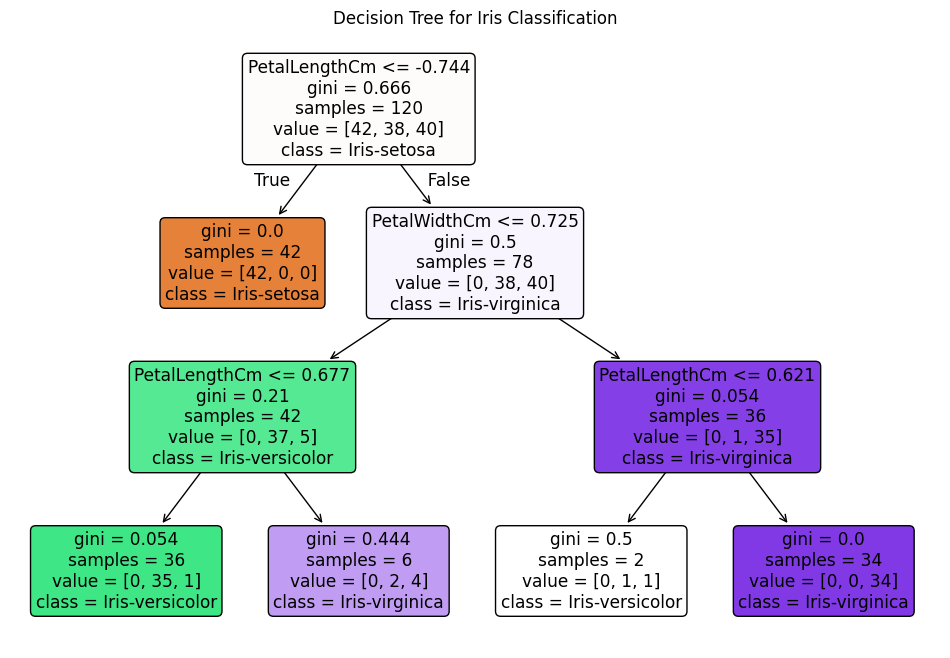

In [6]:
# visualize the decision tree
plt.figure(figsize=(12, 8)) 
plot_tree(model, feature_names=features, class_names=model.classes_, filled=True, rounded=True) 
plt.title('Decision Tree for Iris Classification') 
plt.show()

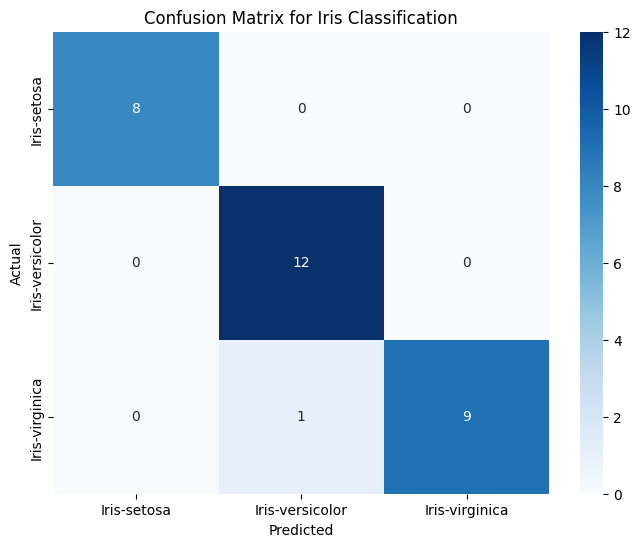

In [7]:
# visualize confusion matrix
plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix for Iris Classification') 
plt.show()

In [8]:
# save the trained model2 to a file using joblib for later use
model_dir = project_dir + '/model' 
os.makedirs(model_dir, exist_ok=True) 
model_filename = os.path.join(model_dir, 'iris_model.pkl') 
joblib.dump(model, model_filename) 
print(f'Model saved as {model_filename}')

Model saved as ./03_decision_tree/model/iris_model.pkl
